In [18]:
%reload_ext memory_profiler
import autograd.numpy as anp
from qoc import grape_schroedinger_discrete
from qoc.standard import (TargetStateInfidelity,
                          conjugate_transpose,
                          get_annihilation_operator,
                          get_creation_operator,
                          SIGMA_Z,
                          generate_save_file_path, )
from memory_profiler import profile
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
from qutip import (qsave,qload)

In [2]:


# Define the system.
def get_memory_manually(N,l):
    """
    0_transmon_pi.py - This module demonstrates
    a simple example of grape on the schroedinger equation
    using time discrete control parameters to evolve a transmon qubit
    form the ground state to the first excited state.
    """


    HILBERT_SIZE = l
    ANNIHILATION_OPERATOR = get_annihilation_operator(HILBERT_SIZE)
    CREATION_OPERATOR = get_creation_operator(HILBERT_SIZE)
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    sigmax = ANNIHILATION_OPERATOR + CREATION_OPERATOR
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    H_SYSTEM_0 = CREATION_OPERATOR*ANNIHILATION_OPERATOR
    # Only real control amplitutdes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM= anp.zeros((l, 1))

    INITIAL_STATE_0=anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0]=1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0]=1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 10  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 3

    # Define output.
    LOG_ITERATION_STEP = 1
    SAVE_ITERATION_STEP = 1
    SAVE_PATH = "./out"
    SAVE_FILE_NAME = "transmon_pi"
    SAVE_FILE_PATH = generate_save_file_path(SAVE_FILE_NAME, SAVE_PATH)
    CONTROL_HAMILTONIAN = [sigmax]

    manual_parameter = {"control_hamiltonian": CONTROL_HAMILTONIAN, "manual_gradient_mode": True}

    def main():
        result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                             COSTS, EVOLUTION_TIME, hamiltonian,
                                             INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                             complex_controls=COMPLEX_CONTROLS,
                                             iteration_count=ITERATION_COUNT,
                                             log_iteration_step=LOG_ITERATION_STEP,
                                             manual_parameter=manual_parameter
                                             )
    if __name__ == "__main__":
        main()




In [3]:


# Define the system.
def get_memory(N,l):
    """
    0_transmon_pi.py - This module demonstrates
    a simple example of grape on the schroedinger equation
    using time discrete control parameters to evolve a transmon qubit
    form the ground state to the first excited state.
    """


    HILBERT_SIZE = l
    ANNIHILATION_OPERATOR = get_annihilation_operator(HILBERT_SIZE)
    CREATION_OPERATOR = get_creation_operator(HILBERT_SIZE)
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    sigmax = ANNIHILATION_OPERATOR + CREATION_OPERATOR
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    H_SYSTEM_0 = CREATION_OPERATOR*ANNIHILATION_OPERATOR
    # Only real control amplitutdes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM= anp.zeros((l, 1))

    INITIAL_STATE_0=anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0]=1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0]=1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 10  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 3

    # Define output.
    LOG_ITERATION_STEP = 1
    SAVE_ITERATION_STEP = 1
    SAVE_PATH = "./out"
    SAVE_FILE_NAME = "transmon_pi"
    SAVE_FILE_PATH = generate_save_file_path(SAVE_FILE_NAME, SAVE_PATH)
    CONTROL_HAMILTONIAN = [sigmax]

    manual_parameter = {"control_hamiltonian": CONTROL_HAMILTONIAN, "manual_gradient_mode": True}

    def main():
        result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                             COSTS, EVOLUTION_TIME, hamiltonian,
                                             INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                             complex_controls=COMPLEX_CONTROLS,
                                             iteration_count=ITERATION_COUNT,
                                             log_iteration_step=LOG_ITERATION_STEP,
                                             
                                             )
    if __name__ == "__main__":
        main()




In [4]:
N=[10,50,100]
l=[2,20]
mem=np.zeros((len(N),len(l)))
for i in range(len(N)):
    for j in range(len(l)):
        N_=N[i]
        l_=l[j]
        mem_temp = %memit -r20 -o get_memory(N_,l_)
        mem[i][j]=max(mem_temp.mem_usage)-mem_temp.baseline

iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total

  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
peak memory: 168.87 MiB, increment: 1.99 MiB
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71328528e-15
  1    | 6.3

iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71328528e-15
  1    | 6.32120559e-01 | 4.15194359e-10
  2    | 6.32120562e-01 | 3.02684886e-04
  3    | 6.32149885e-01 | 2.85729126e-02
  4    | 6.32120793e-01 | 2.56009144e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71328528e-15
  1    | 6.32120559e-01 | 4.15194359e-10
  2    | 6.32120562e-01 | 3.02684886e-04
  3    | 6.32149885e-01 | 2.85729126e-02
  4    | 6.32120793e-01 | 2.56009144e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71328528e-15
  1    | 6.32120559e-01 | 4.15194359e-10
  2    | 6.32120562e-01 | 3.02684886e-04
  3    | 6.32149885e-01 | 2.85729126e-02
  4    | 6.32120793e-01 | 2.56009144e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71328528e-15
  1    | 6.32120559e-01 | 4.15194359e-10
  2    | 6.32120562e-01 | 3.02684886e-04
  3    | 6.32149885e-01 | 2.85729126e-02
  4    | 6.32120793e-01 | 2.56009144e-03
iter   |   total

  0    | 6.32120559e-01 | 3.76146037e-15
  1    | 6.32120559e-01 | 6.23781214e-10
  2    | 6.32120560e-01 | 9.50591806e-05
  3    | 6.32150137e-01 | 1.31556694e-02
  4    | 6.32120790e-01 | 1.16105026e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.76146037e-15
  1    | 6.32120559e-01 | 6.23781214e-10
  2    | 6.32120560e-01 | 9.50591806e-05
  3    | 6.32150137e-01 | 1.31556694e-02
  4    | 6.32120790e-01 | 1.16105026e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.76146037e-15
  1    | 6.32120559e-01 | 6.23781214e-10
  2    | 6.32120560e-01 | 9.50591806e-05
  3    | 6.32150137e-01 | 1.31556694e-02
  4    | 6.32120790e-01 | 1.16105026e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.76146037e-15
  1    | 6.32120559e-01 | 6.23781214e-10
  2    | 6.32120560e-01 | 9.50591806e-05
  3    | 6.32150137e-01 | 1.31556694e-02
  4    | 6.32120790e-01 | 1.16105026e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120

  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046

  0    | 6.32120559e-01 | 1.71131171e-15
  1    | 6.32120559e-01 | 1.49238615e-10
  2    | 6.32120559e-01 | 1.14881849e-05
  3    | 6.32149558e-01 | 9.19539006e-03
  4    | 6.32120728e-01 | 7.04535035e-04
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.71131171e-15
  1    | 6.32120559e-01 | 1.49238615e-10
  2    | 6.32120559e-01 | 1.14881849e-05
  3    | 6.32149558e-01 | 9.19539006e-03
  4    | 6.32120728e-01 | 7.04535035e-04
peak memory: 196.18 MiB, increment: 12.75 MiB


In [5]:
mem=np.array([[ 1.98828125,  4.08203125],
       [ 4.45703125,  6.86328125],
       [ 5.875     , 12.74609375]])

In [4]:
N=[10,50,100]
l=[2,20]
mem2=np.zeros((len(N),len(l)))
for i in range(len(N)):
    for j in range(len(l)):
        N_=N[i]
        l_=l[j]
        mem_temp = %memit -r20 -o get_memory_manually(N_,l_)
        mem2[i][j]=max(mem_temp.mem_usage)-mem_temp.baseline

iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total

  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914202e-01 | 2.74911587e+00
  3    | 2.65046888e-01 | 2.72071449e+00
  4    | 2.56279071e-01 | 2.69124583e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 2.80264290e+00
  1    | 2.82875827e-01 | 2.77643108e+00
  2    | 2.73914

iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.15800546e-15
  1    | 6.32120559e-01 | 5.75689697e-09
  2    | 6.32121063e-01 | 3.75516809e-03
  3    | 6.32143265e-01 | 2.51481422e-02
  4    | 6.32120811e-01 | 2.65356168e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.15800546e-15
  1    | 6.32120559e-01 | 5.75689697e-09
  2    | 6.32121063e-01 | 3.75516809e-03
  3    | 6.32143265e-01 | 2.51481422e-02
  4    | 6.32120811e-01 | 2.65356168e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.15800546e-15
  1    | 6.32120559e-01 | 5.75689697e-09
  2    | 6.32121063e-01 | 3.75516809e-03
  3    | 6.32143265e-01 | 2.51481422e-02
  4    | 6.32120811e-01 | 2.65356168e-03
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.15800546e-15
  1    | 6.32120559e-01 | 5.75689697e-09
  2    | 6.32121063e-01 | 3.75516809e-03
  3    | 6.32143265e-01 | 2.51481422e-02
  4    | 6.32120811e-01 | 2.65356168e-03
iter   |   total

  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875

iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 1.27949489e+00
  1    | 2.82875827e-01 | 1.26752838e+00
  2    | 2.73914203e-01 | 1.25505812e+00
  3    | 2.65046889e-01 | 1.24209199e+00
  4    | 2.56279072e-01 | 1.22863862e+00
iter   |   total

  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875828e-01 | 8.98538387e-01
  2    | 2.73914204e-01 | 8.89698346e-01
  3    | 2.65046891e-01 | 8.80506789e-01
  4    | 2.56279074e-01 | 8.70969827e-01
iter   |   total error  |    grads_l2   
  0    | 2.91926582e-01 | 9.07021335e-01
  1    | 2.82875

  4    | 6.32120784e-01 | 8.12578925e-04
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.93461919e-15
  1    | 6.32120559e-01 | 1.00483260e-09
  2    | 6.32120561e-01 | 7.68875758e-05
  3    | 6.32149895e-01 | 9.24862918e-03
  4    | 6.32120784e-01 | 8.12578925e-04
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.93461919e-15
  1    | 6.32120559e-01 | 1.00483260e-09
  2    | 6.32120561e-01 | 7.68875758e-05
  3    | 6.32149895e-01 | 9.24862918e-03
  4    | 6.32120784e-01 | 8.12578925e-04
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.93461919e-15
  1    | 6.32120559e-01 | 1.00483260e-09
  2    | 6.32120561e-01 | 7.68875758e-05
  3    | 6.32149895e-01 | 9.24862918e-03
  4    | 6.32120784e-01 | 8.12578925e-04
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.93461919e-15
  1    | 6.32120559e-01 | 1.00483260e-09
  2    | 6.32120561e-01 | 7.68875758e-05
  3    | 6.32149895e-01 | 9.24862918e-03
  4    | 6.32120

In [19]:
mem2

array([[0.5703125 , 0.96484375],
       [0.        , 0.        ],
       [0.015625  , 0.00390625]])

In [15]:

def memory_plot(N,l,mem,mem2):
    for i in range(len(N)):
        fig, ax = plt.subplots()
        ax.plot(l,mem[i],marker = 'o')
        ax.plot(l,mem2[i],marker = 'o')
        ax.legend(["AD","Manual"])
        ax.set_xlabel ( "memory usage/MiB")
        ax.set_ylabel ('Hilbert space dimension')
        ax.set_title('time step is'+str(N[i]))
        ax.set_yscale('log')
        ax.set_xscale('log')
        plt.show()
    for i in range(len(l)):
        fig, ax = plt.subplots()
        mem_=[]
        mem_2=[]
        for j in range(len(N)):
            mem_.append(mem[j][0])
            mem_2.append(mem2[j][0])
        
        ax.plot(N,mem_,marker = 'o')
        ax.plot(N,mem_2,marker = 'o')
        ax.legend(["AD","Manual"])
        ax.set_xlabel ( "memory usage/MiB")
        ax.set_ylabel ('Time step')
        ax.set_title('Hilbert space dimension'+str(l[i]))
        ax.set_yscale('log')
        ax.set_xscale('log')
        plt.show()
    

In [16]:
mem2

array([[0.5703125 , 0.96484375],
       [0.        , 0.        ],
       [0.015625  , 0.00390625]])

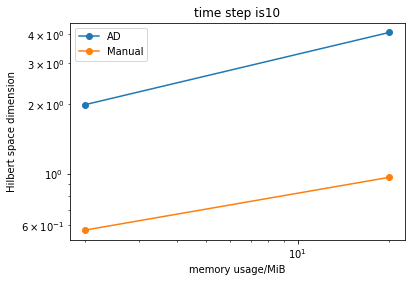

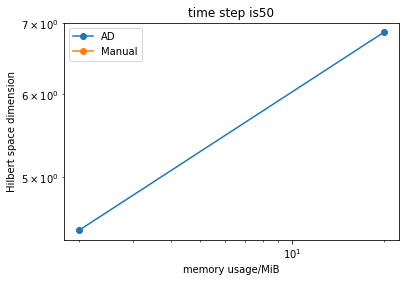

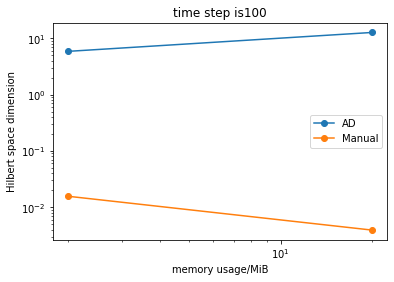

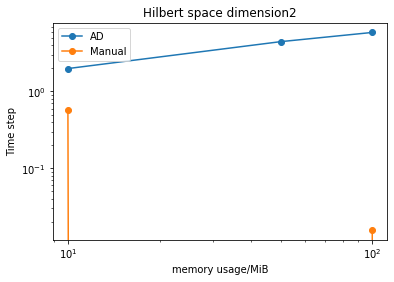

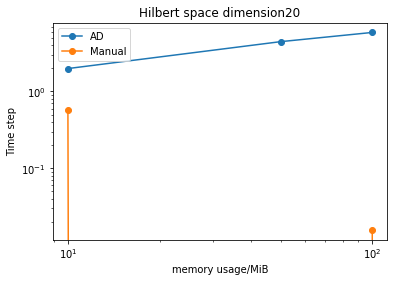

In [17]:
memory_plot(N,l,mem,mem2)